In [1]:
from matplotlib.pyplot import *
from matplotlib import pyplot
import math
from scipy.optimize import *

In [2]:
pyplot.rcParams["figure.figsize"] = (20,10)

In [3]:
AcuityNumber = 10
SectionNumber = 0

In [4]:
class Section:
    
    def __init__(self,mode):
        self.mode = mode
        self.A_right = [0]*AcuityNumber
        self.A_total = [0]*AcuityNumber
        self.A_percent = [0]*AcuityNumber
        self.delay_dict_list = []
        self.delay_repeat = 9
        self.delay_percent_list = []
        self.delay_dict = {}
        self.dir_dict = {}
        
    def calcul_percent(self):
        for i in range(0,len(self.A_total)):
            if self.A_total[i] != 0:
                self.A_percent[i] = self.A_right[i] / self.A_total[i]
                
    def calcul_delay(self):
        itera = 0
        for delay_dict in self.delay_dict_list:
            self.delay_percent_list.append({})
            for elem in delay_dict:
                self.delay_percent_list[itera][elem] = self.delay_dict_list[itera][elem] / self.delay_repeat
            itera += 1
        

In [5]:
def sigmoid1(x):
    return 1 / (1 + math.exp(-x))

In [6]:
def sigmoid2(x, a, b):
    return 0.875 / (1.0 + np.exp(-a*(x-b))) + 0.125

$$f(x) = \frac {L}{1+e^{-k(x-x_0)}} + Base$$

In [7]:
def sigmoid3(x,a,b,c):
    return c / (1.0+np.exp(-a*(x-b))) +0.125

def cur_fit(y_data):
    popt, pcov = curve_fit(sigmoid2, range(0,len(y_data)), y_data)
    tpl, = plot(range(0,len(y_data)), sigmoid2(range(0,len(y_data)), *popt))
    print(popt)
    return tpl,popt

In [8]:
def cur_fit(y_data, x_data = []):
    if(len(x_data) == 0):
        x_data = range(0,len(y_data))
    popt, pcov = curve_fit(sigmoid3, x_data, y_data)
    tpl, = plot(x_data, sigmoid3(x_data, *popt))
    print(popt)
    return tpl,popt

In [9]:
def percent_cal(k,x0,y):
    loge1dym1 = math.log((1/y)-1)
    return (loge1dym1)/(-k) + x0

In [10]:
path_name = "./data/"
file_name = "AcuityLog_2019_07_30_11_47_52.txt"
head_file_name = "JumpLog__2019_07_30_11_47_52_1.txt"

In [11]:
file = open(path_name+file_name,"r")
lines = file.readlines()

In [12]:
sections = []
temp_section = None
last_delay = 100
init_delay = 0.0
itera = -1
last_DSS = -1
t_iter = 0
for line in lines:
    strings = line.split()
    if(len(strings) > 3):
        if(strings[1] == "start"):
            if(temp_section != None):
                sections.append(temp_section)
            temp_section = Section(strings[4])
        else:
            try:
                AZ = int(strings[3])
            except:
                AZ = -100
            if(AZ>=0):
                temp_section.A_total[AZ] += 1
                if(last_delay == init_delay and itera == 0):
                    temp_section.delay_repeat += 1
                if(not strings[5] in temp_section.dir_dict):
                    temp_section.dir_dict[strings[5]] = (0,0)
                if(strings[4] == "True"):
                    temp_section.delay_dict[last_DSS] = (last_delay,1)
                    temp_section.A_right[AZ] += 1
                    if(len(temp_section.delay_dict_list) > 0):
                        if(not last_delay in temp_section.delay_dict_list[-1].keys()):
                            temp_section.delay_dict_list[-1][last_delay] = 1
                        else:
                            temp_section.delay_dict_list[-1][last_delay] += 1
                    temp_section.dir_dict[strings[5]] = (temp_section.dir_dict[strings[5]][0] + 1, temp_section.dir_dict[strings[5]][1] + 1)
                else:
                    temp_section.delay_dict[last_DSS] = (last_delay,0)
                    temp_section.dir_dict[strings[5]] = (temp_section.dir_dict[strings[5]][0], temp_section.dir_dict[strings[5]][1] + 1)
            elif(AZ == -2):
                if(float(strings[4]) < last_delay):
                    itera += 1
                    temp_section.delay_dict_list.append({})
                last_delay = float(strings[4])
                last_DSS = strings[1]
                if(temp_section.delay_repeat == 0):
                    init_delay = float(strings[4])
if(temp_section != None):
    sections.append(temp_section)

for section in sections:
    section.calcul_percent()
    
for section in sections:
    section.calcul_delay()
    

In [13]:
def draw_dir_bar(dir_dict):
    dir_dict = sorted(dir_dict.items())
    print(dir_dict)
    keys, RWTT = zip(*(dir_dict))
    RW,TT = zip(*(RWTT))
    percect = np.divide(RW,TT)
    pyplot.bar(keys,RW,width = -0.4 ,align='edge')
    pyplot.bar(keys,TT,width = 0.4 ,align='edge')
    pyplot.grid(axis = 'y')
    pyplot.savefig("./results/"+file_name[:-4]+"_DIR"+"0"+".png")
    pyplot.show()
    pyplot.bar(keys,percect,width = 0.4 ,align='center')
    pyplot.grid(axis = 'y')
    pyplot.savefig("./results/"+file_name[:-4]+"_DIR"+"1"+".png")
    
#draw_dir_bar(sections[-1].dir_dict)

In [14]:
head_arr = []
head_turn_arr = []
def read_head():
    file = open(path_name+head_file_name,"r")
    lines = file.readlines()
    for line in lines:
        strings = line.split()
        if(len(strings) > 4):
            if(strings[4] == "head_stop"):
                head_arr.append(int(strings[2]))
            elif(strings[4] == "head_turned"):
                head_turn_arr.append(int(strings[2]))
read_head()         
print(head_arr)
print(len(head_arr))
print(head_turn_arr)
print(len(head_turn_arr))

[1561480, 1567334, 1573114, 1576974, 1581461, 1585074, 1589714, 1593680, 1597641, 1601900, 1606440, 1610607, 1614414, 1618967, 1624387, 1630067, 1635766, 1642213, 1647360, 1654366, 1659986, 1668393, 1702459, 1709992, 1715725, 1720392, 1725285, 1730279, 1735345, 1740179, 1745799, 1750418, 1755872, 1760558, 1765371, 1771065, 1775751, 1780318, 1785558, 1791404, 1796211, 1801084, 1806298, 1811464, 1816105, 1821304, 1826844, 1831591, 1837517, 1842117, 1847624, 1858197, 1862630, 1867570, 1871730, 1875957, 1880043, 1884984, 1889743, 1894884, 1898550, 1903716, 1907736, 1912989, 1917710, 1922776, 1927903, 1932196, 1936910, 1941649, 1946216, 1950469]
72
[1561061, 1566941, 1572408, 1576574, 1580894, 1584734, 1589267, 1593294, 1597207, 1601534, 1605934, 1610187, 1614020, 1618520, 1623787, 1629640, 1635280, 1641667, 1646927, 1654020, 1659527, 1668213, 1702059, 1709532, 1715326, 1719986, 1724865, 1729838, 1734892, 1739765, 1745412, 1749958, 1755412, 1760112, 1764991, 1770645, 1775358, 1779865, 17851

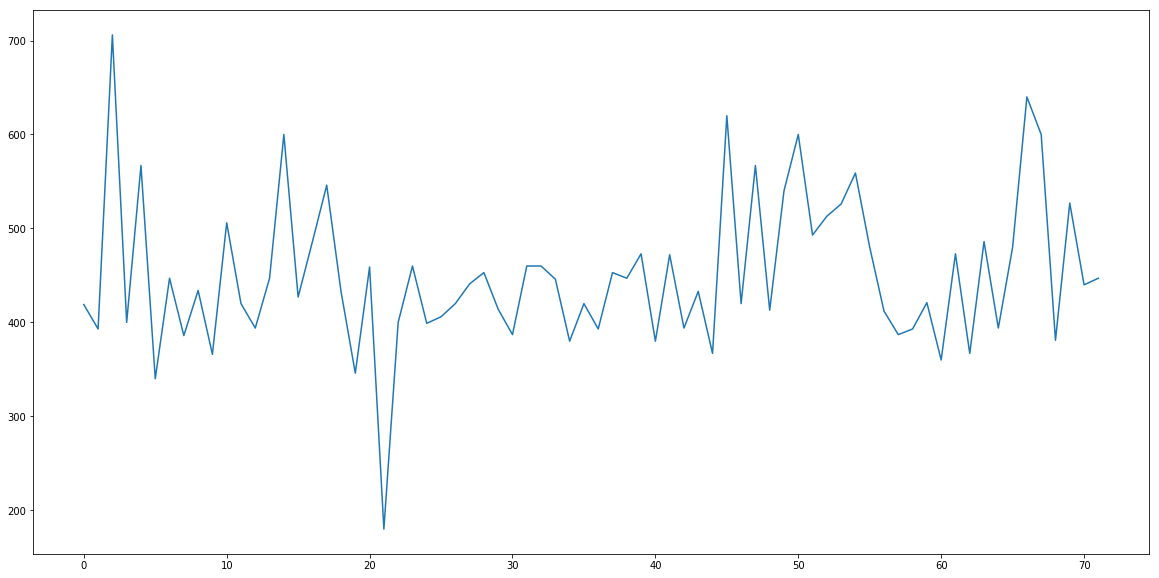

In [15]:
head_TTS = np.subtract(head_arr,head_turn_arr)
plot(range(0,len(head_arr)),head_TTS)

In [16]:
HDrange = 1.0 / (1/960)
#SS, RW, HD
HD_arr = []

def head_delay(section,head_ar):
    for head in head_ar:
        for delay in section.delay_dict.keys():
            if(abs(head - int(delay)) <= HDrange):
                HD_arr.append((int(delay) - head,section.delay_dict[delay][1],
                               section.delay_dict[delay][0]))
                break

                
head_delay(sections[SectionNumber],head_arr)
#HD_arr.sort(key = lambda tup: tup[0])
print(HD_arr)
print(len(HD_arr))

[(-412, 1, 0.0), (-387, 0, 0.0), (-700, 1, 0.0), (-393, 1, 0.0), (-561, 0, 0.0), (-333, 1, 0.0), (-440, 1, 0.0), (-373, 1, 0.0), (-427, 1, 0.0), (-286, 1, 0.08), (-426, 1, 0.08), (-340, 1, 0.08), (-314, 1, 0.08), (-367, 0, 0.08), (-521, 1, 0.08), (-347, 1, 0.08), (-406, 0, 0.08), (-467, 0, 0.08), (-274, 1, 0.16), (-186, 1, 0.16), (-300, 1, 0.16), (-20, 0, 0.16), (-240, 0, 0.16), (-299, 1, 0.16), (-239, 1, 0.16), (-247, 0, 0.16), (-260, 1, 0.16), (-200, 1, 0.24), (-220, 1, 0.24), (-180, 1, 0.24), (-154, 0, 0.24), (-220, 1, 0.24), (-220, 1, 0.24), (-213, 1, 0.24), (-140, 1, 0.24), (-187, 1, 0.24), (-80, 1, 0.32), (-140, 0, 0.32), (-127, 1, 0.32), (-159, 1, 0.32), (-67, 1, 0.32), (-160, 1, 0.32), (-80, 1, 0.32), (-120, 1, 0.32), (-60, 1, 0.32), (-233, 1, 0.4), (-33, 0, 0.4), (-180, 1, 0.4), (-26, 1, 0.4), (-153, 1, 0.4), (-213, 1, 0.4), (-107, 1, 0.4), (-120, 1, 0.4), (-140, 0, 0.4), (-93, 1, 0.48), (-14, 1, 0.48), (53, 1, 0.48), (79, 0, 0.48), (73, 1, 0.48), (46, 0, 0.48), (106, 1, 0.48)

In [17]:
H_inter = 0.08
HS_inter = H_inter * 960
print(HS_inter)
#print(HS_inter)
def cluster(HD_arr):
    index = 0
    cluster_arr = {}
    total_arr = {}
    res_arr = {}
    for HD in HD_arr:
        index = abs(HD[0]) // HS_inter
        index = (index + 1) if (HD[0] >= 0)  else (-index - 1)
        if(not index in total_arr):
            total_arr[index] = 1
        else:
            total_arr[index] += 1
        if(HD[1] == 1):
            if(not index in cluster_arr):
                cluster_arr[index] = 1
            else:
                cluster_arr[index] += 1
        else:
            if(not index in cluster_arr):
                cluster_arr[index] = 0
        for key in cluster_arr:
            res_arr[key] = cluster_arr[key] / total_arr[key]
    return res_arr

HC_dict= cluster(HD_arr)
HC_dict = sorted(HC_dict.items(), key = lambda HCD : HCD[0])
print(HC_dict)

76.8
[(-10.0, 1.0), (-8.0, 0.0), (-7.0, 0.5), (-6.0, 0.7142857142857143), (-5.0, 0.8333333333333334), (-4.0, 0.7777777777777778), (-3.0, 0.9230769230769231), (-2.0, 0.75), (-1.0, 0.7142857142857143), (1.0, 0.7142857142857143), (2.0, 0.8333333333333334), (3.0, 1.0)]


In [18]:
def draw_Compare_Head(cur_popts,x_array,y_array):
    Precise = 0.01
    tpl, = plot(x_array,y_array,".")
    x_min = np.amin(x_array)
    x_max = np.amax(x_array)
    cur_tpl, = plot(np.arange(x_min,x_max,Precise), sigmoid3(np.arange(x_min,x_max,Precise), *cur_popts))

index  (-10.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 1.0, 2.0, 3.0)
index  [-0.8  -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08  0.08  0.16  0.24]
res  [1.         0.         0.5        0.71428571 0.83333333 0.77777778
 0.92307692 0.75       0.71428571 0.71428571 0.83333333 1.        ]


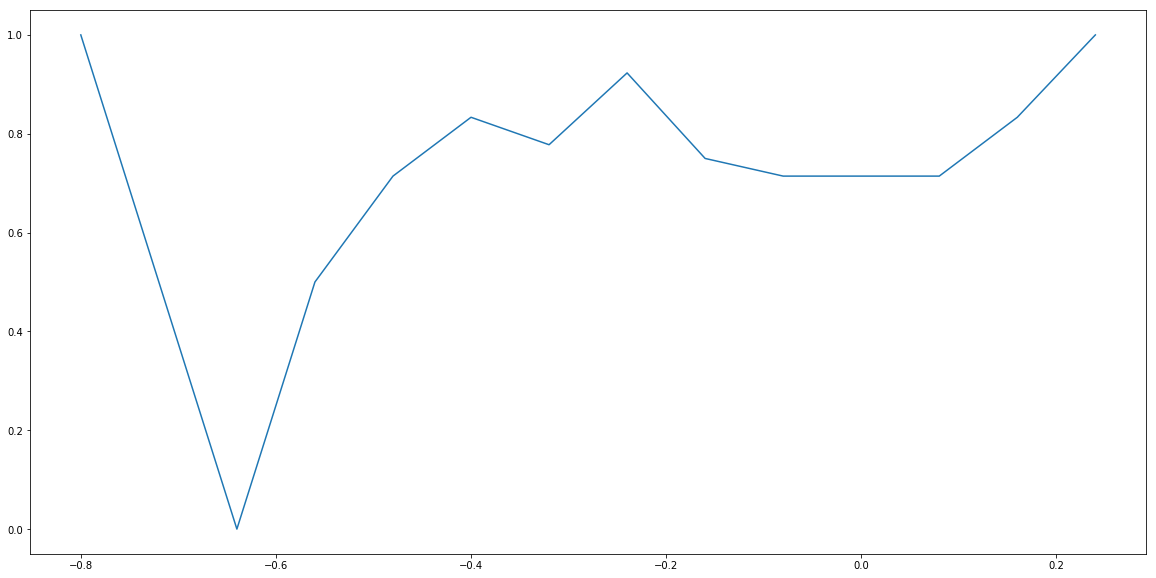

No fit


In [35]:
if(len(HC_dict) > 0):
    index, res = zip(*HC_dict)
    print("index ",index)
    index = np.asarray(index)
    res = np.asarray(res)
    index = index*H_inter
    print("index ",index)
    print("res ",res)

    plot(index,res)
    pyplot.show()
    
    try:
        H_tpl,H_popt = cur_fit(res,x_data = index)
        pyplot.show()
        draw_Compare_Head(H_popt,index,res)
        pyplot.show()
    except:
        print("No fit")

for(section in sections):
    

In [20]:
def plot_acuity():
    i = -1
    legends = []
    plines = []
    for section in sections:
        i += 1
        tpl, = plot(range(0,AcuityNumber),sections[i].A_percent)
        plines.append(tpl)
        legends.append(sections[i].mode)
    #legends[-1] = "GazeShft"
    pyplot.legend(legends)
    #plines[0].remove()

In [21]:
for delay in sections[SectionNumber].delay_percent_list:
    print(delay.keys(),delay.values())

dict_keys([0.0, 0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56]) dict_values([0.3888888888888889, 0.3333333333333333, 0.3333333333333333, 0.4444444444444444, 0.4444444444444444, 0.3888888888888889, 0.3888888888888889, 0.3888888888888889])


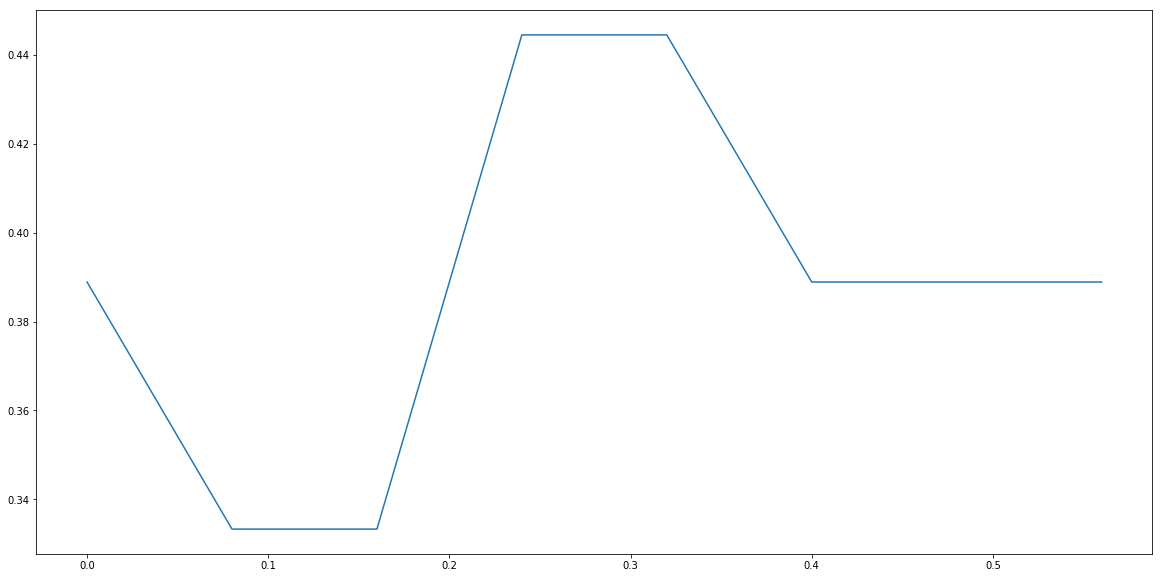

In [22]:
if(len(sections[SectionNumber].delay_percent_list) > 0):
    tpl, = plot(sections[SectionNumber].delay_percent_list[0].keys(),sections[SectionNumber].delay_percent_list[0].values())

[ 0.38753507 -4.08755135  0.28307084]


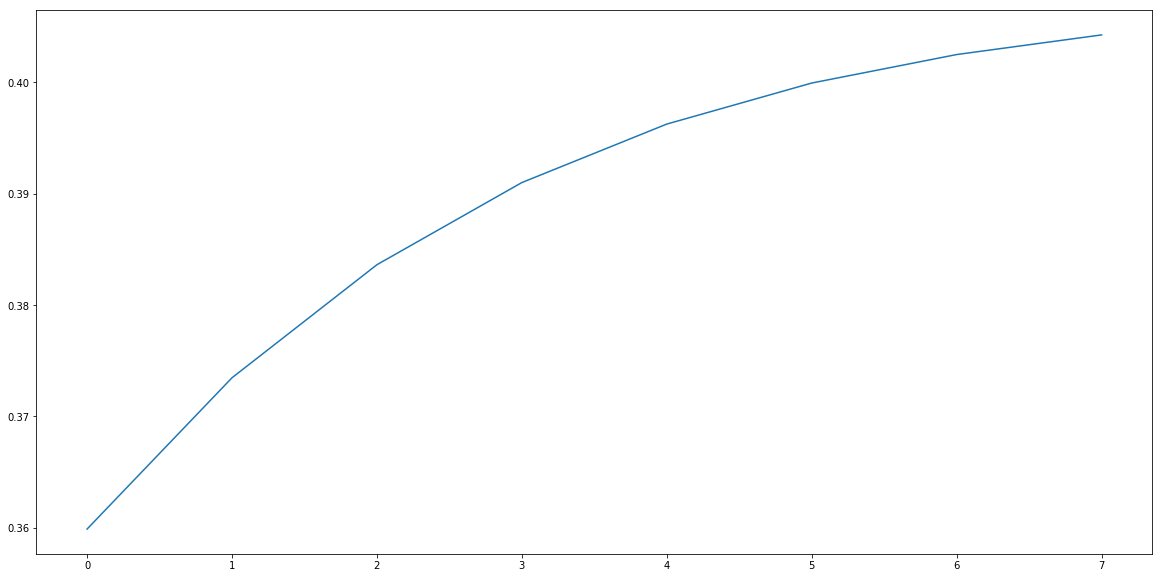

In [23]:
if(len(sections[SectionNumber].delay_percent_list) > 0):
    DF_tpl,DF_popt = cur_fit(list(sections[SectionNumber].delay_percent_list[0].values()))

In [24]:
start = 60826
end = 206593
frac = 1.0/960.0
def draw_compare_WYData(y_array,cur_popts,index):
    Precise = 0.1
    tpl, = plot(range(0,len(y_array)),y_array,".")
    cur_tpl, = plot(np.arange(0,len(y_array),Precise), sigmoid3(np.arange(0,len(y_array),Precise), *cur_popts))
#    for head_ss in head_arr:
#        if(head_ss >= start and head_ss <= end):
#            time = (head_ss - start)*frac
#            pyplot.axvline(x=time)
    pyplot.savefig("./results/"+file_name[:-4]+"_DR"+index+".png")

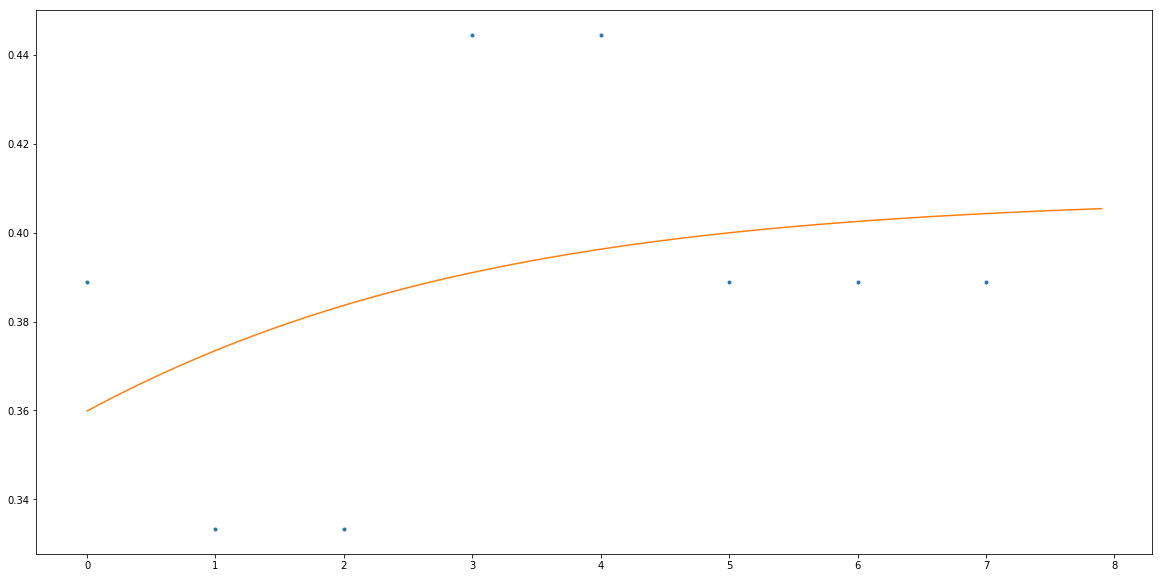

In [25]:
if(len(sections[SectionNumber].delay_percent_list) > 0):
    draw_compare_WYData(list(sections[SectionNumber].delay_percent_list[0].values()),DF_popt,"2")

In [26]:
def plot_delay():
    i = 0
    legends = []
    plines = []
    for section in sections:
        for delay in section.delay_percent_list:
            tpl, = plot(delay.keys(),delay.values())
            plines.append(tpl)
            legends.append(i)
            i += 1
    pyplot.legend(legends)

DynamicAcuity
[33.29141164  1.73972349 -0.12500062]
DynamicAcuity
[3.15759876 1.31763526 0.83021379]


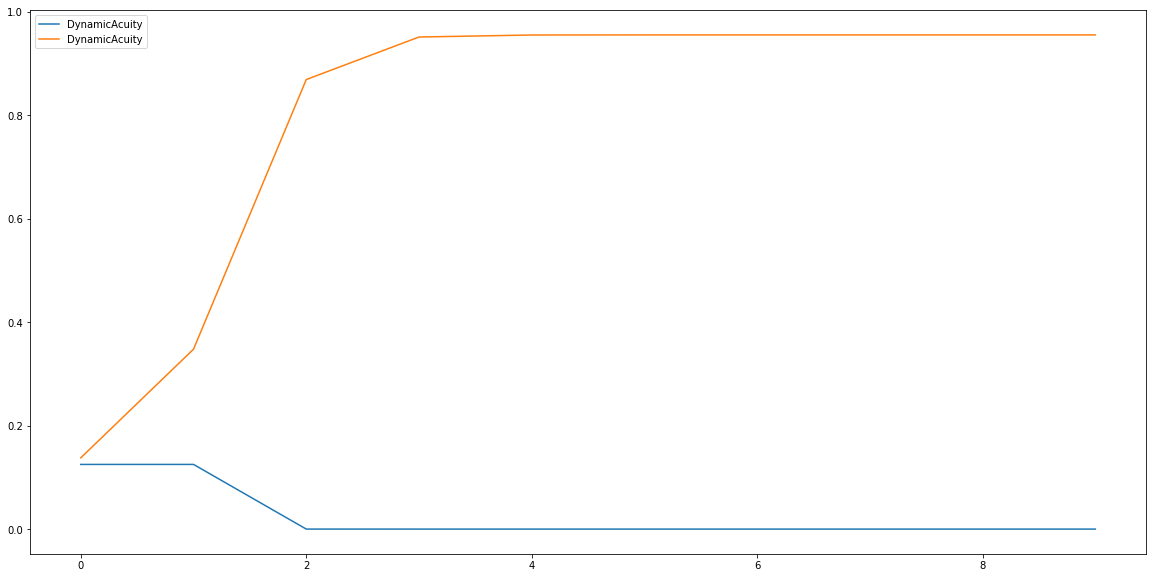

In [27]:
legends2 = []
plines = []
cur_popts = []
for section in sections:
    print(section.mode)
    legends2.append(section.mode)
    tlp,popt = cur_fit(section.A_percent)
    plines.append(tlp)
    cur_popts.append(popt)
#legends2[-1] = "GazeShft"
pyplot.legend(legends2)
#plines[0].remove()

In [28]:
Precise = 0.1

def draw_compare(index):
    tpl, = plot(range(0,AcuityNumber),sections[index].A_percent,".")
    cur_tpl, = plot(np.arange(0,len(sections[index].A_percent),Precise), sigmoid2(np.arange(0,len(sections[index].A_percent),Precise), *cur_popts[index]))
    pyplot.legend([sections[index].mode])

In [29]:
def draw_compare(index):
    tpl, = plot(range(0,AcuityNumber),sections[index].A_percent,".")
    cur_tpl, = plot(np.arange(0,len(sections[index].A_percent),Precise), sigmoid3(np.arange(0,len(sections[index].A_percent),Precise), *cur_popts[index]))
    pyplot.legend([sections[index].mode])
    pyplot.savefig("./results/"+file_name[:-4]+"_AR"+str(index)+".png")

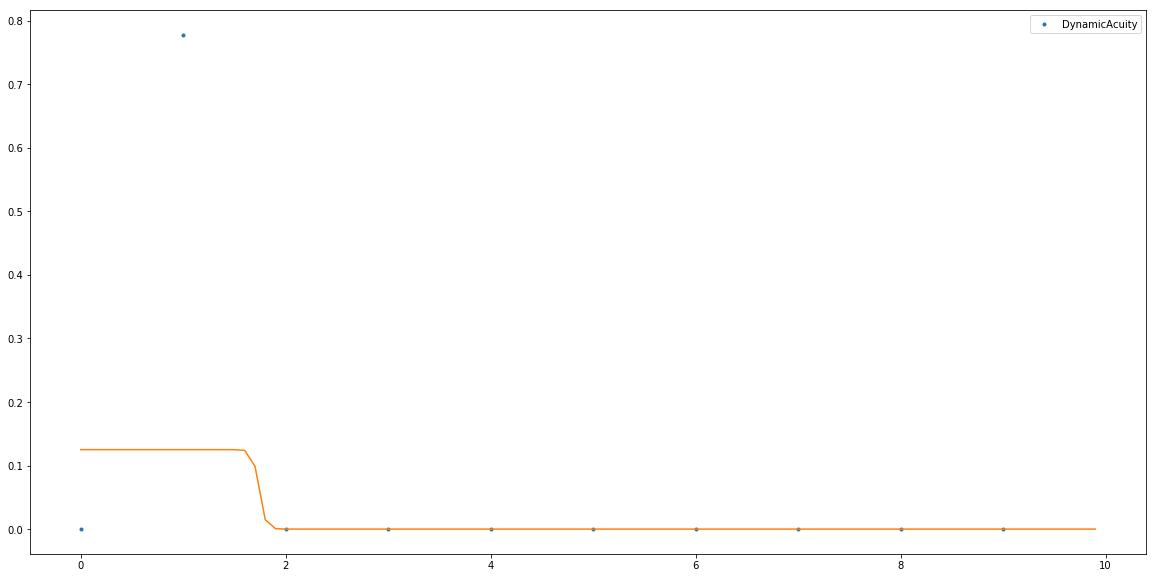

In [30]:
draw_compare(0)

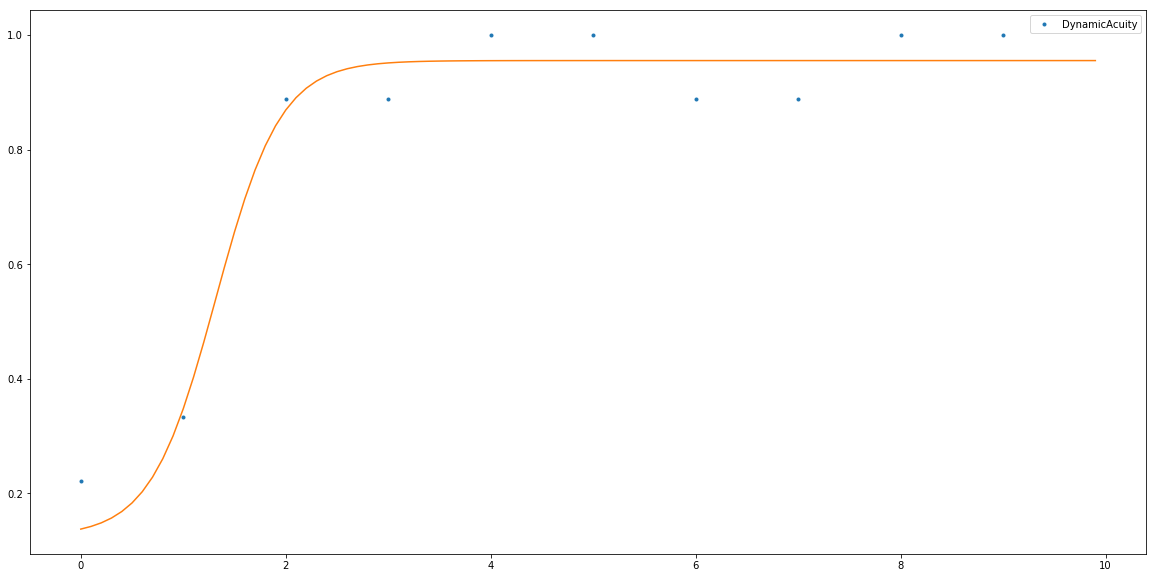

In [31]:
draw_compare(1)

In [32]:
draw_compare(2)

IndexError: list index out of range

In [ ]:
draw_compare(3)

In [ ]:
y = 0.8
print(percent_cal(1.27684543, 0.88405065 ,y))
print(percent_cal(2.44631207, 0.69156386 ,y))
print(percent_cal(3.20700723, 1.17558442 ,y))
print(percent_cal(0.75669271, 1.70771435 ,y))